<h1 style="color:green; text-align:center;">Project 1 : Sugarcane Production Analysis</h1>


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Overview of top 7 rows 
##### Also can use df.sample(x) for random x rows of data.

In [4]:
df.head(7)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27
6,6,Colombia,South America,36.951.213,740075,416.626,"88.691,5"


In [3]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

### Cols and rowsin the dataset

In [5]:
df.shape

(103, 7)

# **<span style="color:orange;">Data Cleaning</span>**


Some of the basic operations of data cleaning which is important part of the eda results in the better data and clean data to perform further analysis.

1. Correcting the commas and points int he various columns like production , production per person ,average ,yeild per kg.<br>
here will be required the **<span style="color:red;">str.replace()</span>** fucntion to all this.

In [6]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [7]:
df.head(3)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1


2. Remnoving the unwanted space from the cols names using  **<span style="color:red;">str.rename()</span>** . 

In [8]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [9]:
df.head(3)

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1


3 . Removing unamed cols as not of any use and serachying for null values and removing null values and reseting indexes.


In [10]:
df = df.drop( "Unnamed: 0", axis = 1)
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [11]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
df = df.dropna().reset_index().drop("index", axis = 1)
df.tail(5)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8
101,Syria,Asia,1,0,0,83034.2


 3. Finding unique elemets in each cols and further modifying the data types of the cols as per need.

In [13]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [14]:
df.dtypes


Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [15]:

df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [16]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

******************************************************************************************************************************************************


# **<span style="color:orange;">Univariate Analysis</span>**



Univariate analysis is a key technique in Exploratory Data Analysis (EDA) that focuses on analyzing a single variable at a time. It helps in understanding the distribution, central tendency, and spread of data for that particular variable. Common methods of univariate analysis include calculating summary statistics such as mean, median, and mode, as well as visualizing data using histograms, bar plots, and box plots. By focusing on one variable, univariate analysis simplifies the exploration process and helps identify patterns or anomalies, which can further inform deeper analysis in multivariate contexts.









### Q: How many countries produce sugarcane from each continent?

In [20]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

### Desrcing some properties of the data.


In [21]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Plotting the data 

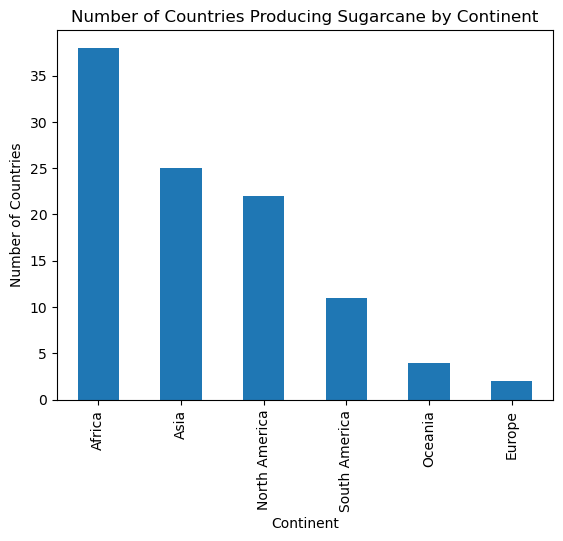

In [25]:
df["Continent"].value_counts().plot(kind = "bar",)
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Number of Countries Producing Sugarcane by Continent')
plt.show()

## Checking Outliers

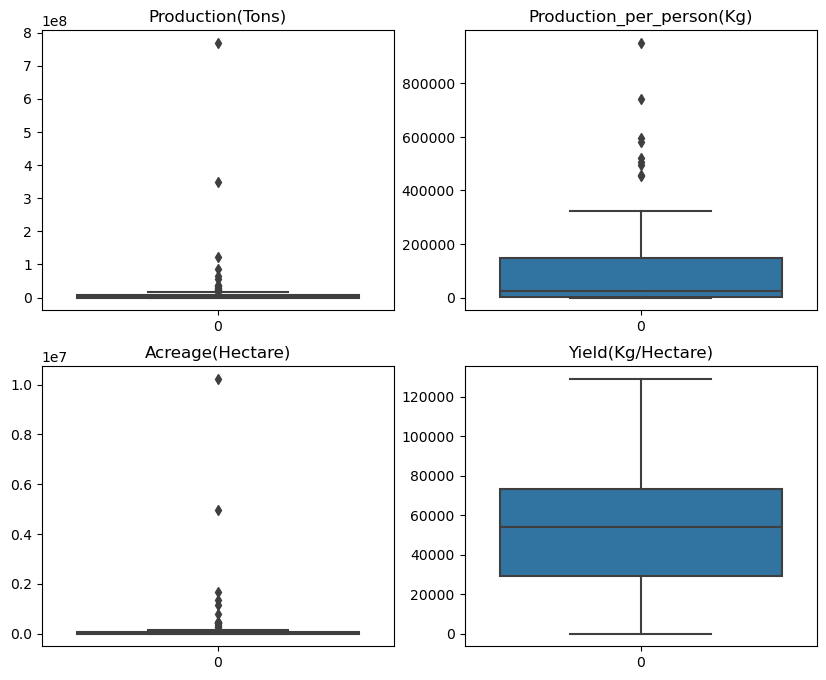

In [27]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()


We have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

## Distribution of the columns

plt.figure(figsize=(10,10)): This sets the overall size of the figure to 10x10 inches, which is a square layout to accommodate multiple subplots.

plt.subplot(2,2,1): This specifies that the following plot should be placed in the first position of a 2x2 grid of subplots.

sns.distplot(df["Production(Tons)"]): This creates a distribution plot (or density plot) for the Production(Tons) column of the DataFrame df. sns.distplot shows the distribution of the data, often including both a histogram and a kernel density estimate (KDE).

plt.title("Production(Tons)"): Sets the title of the subplot to "Production(Tons)".

C:\Users\deeps\AppData\Local\Temp\ipykernel_26772\1909675950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\deeps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deeps\AppData\Local\Temp\ipykernel_26772\1909675950.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

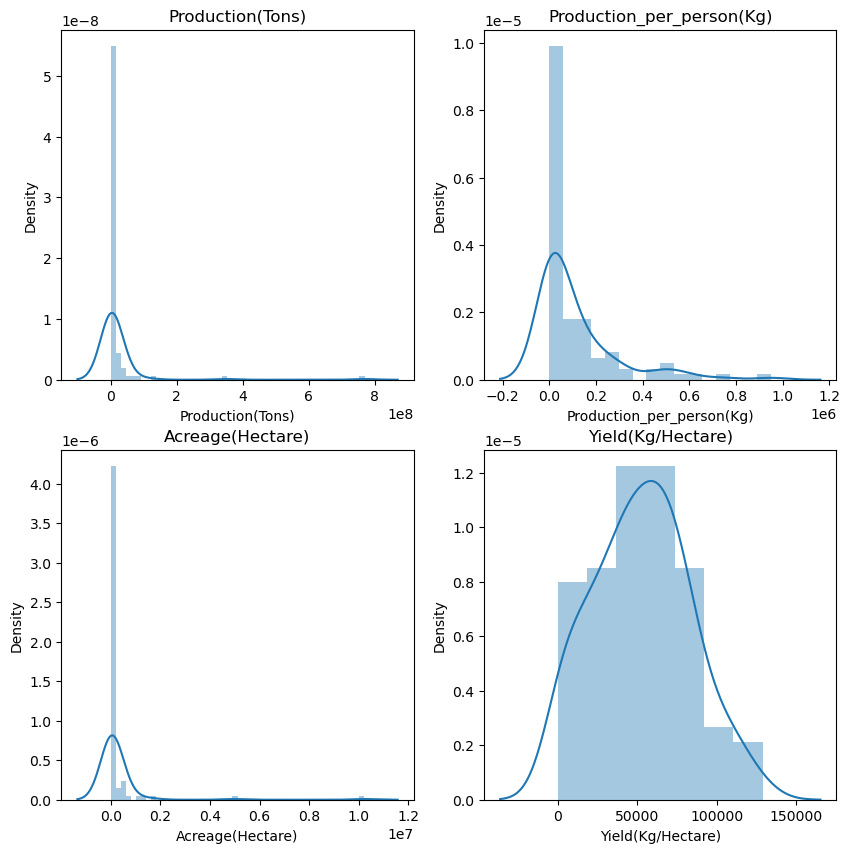

In [28]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

#### Violin Plot

Purpose: A violin plot is used to visualize the distribution of a dataset. It combines aspects of a box plot with a kernel density plot. The result is a plot that shows the probability density of the data at different values, giving a more detailed view of the distribution's shape.

Features:

Density: The width of the violin at different values represents the density of the data. Wider sections indicate higher density, meaning more data points are clustered around that value.
Quartiles: Often includes markers or lines for the median and quartiles, similar to a box plot.
Symmetry: Violin plots are symmetric around the center, which helps in understanding the distribution shape.
Code Specification

<Axes: >

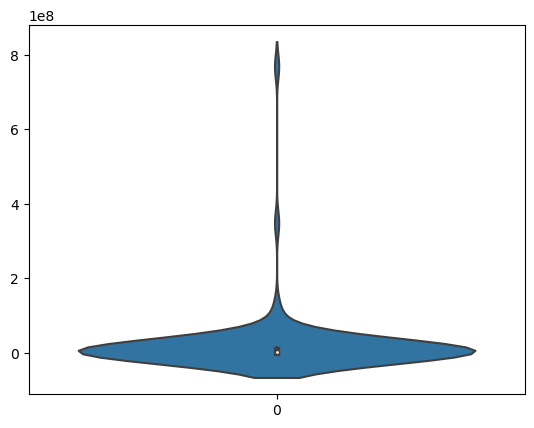

In [29]:
sns.violinplot(df["Production(Tons)"])

# **<span style="color:orange;">Bivariate Analysis</span>**


Bivariate analysis explores the relationship between two variables to understand their interaction. It includes correlation analysis to measure linear relationships, scatter plots to visualize trends, and regression analysis to model dependencies. Cross-tabulations are used for categorical variables, while heatmaps highlight correlations. This analysis helps identify patterns, trends, and influences between variables, guiding further investigation and decisions.

#### Q. Which country produces maximum sugarcane?

We would a create  anew data frame for that for this two factors further to discuss aboput his two ,

In [31]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")
df_new.sample(5)

,Production(Tons)
Country,
Senegal,696992.0
Spain,394.0
Jamaica,1422432.0
Congo-Brazzaville,687365.0
Niger,216037.0


#### Adding a new column of percentage into the new data frame

In [61]:
df_new['Production(Tons)_percent'] = df_new['Production(Tons)'] / df_new['Production(Tons)'].sum() * 100

In [63]:
df_new.rename(columns={'Production_Tons_percent': 'Production(Tons)_percent'}, inplace=True)
df_new.sample(5)




,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Production(Tons)_percent
32,Bangladesh,Asia,4207592.0,25481.0,98357.0,42778.8,2.229330e-01
57,Senegal,Africa,696992.0,44321.0,5902.0,118085.3,3.692909e-02
101,Syria,Asia,1.0,0.0,0.0,83034.2,5.298352e-08
92,Portugal,Europe,5429.0,528.0,62.0,88274.4,2.876475e-04
86,Benin,Africa,12017.0,1058.0,598.0,20095.3,6.367029e-04


Creating a pie chart for this percentages with country.

<Axes: ylabel='Production(Tons)_percent'>

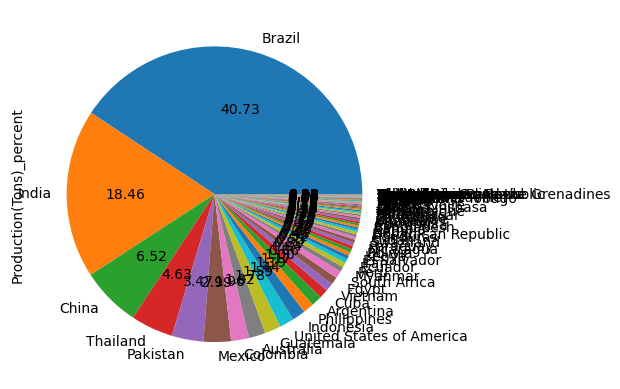

In [34]:
df_new["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

<b> NOTE : </b>As in the above pie chart we can see that various of the country with very very less percenatfge of produxtion are overlapped <br> so When there are many categories or countries, pie charts can become cluttered. Here are some efficient ways to handle this:


<b>1. Aggregate Small Categories:</b> Combine smaller categories into an "Other" category to reduce clutter. This can be done by setting a threshold for minimum percentage representation

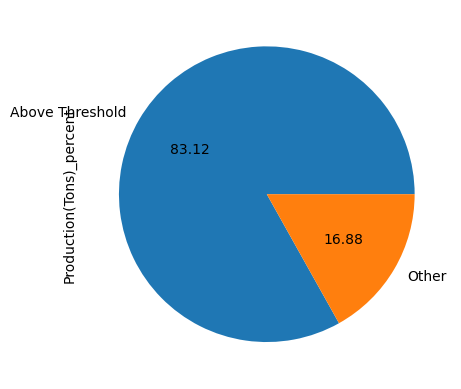

In [40]:
threshold = 2.9

df_new['Category'] = df_new['Production(Tons)_percent'].apply(lambda x: 'Other' if x <= threshold else 'Above Threshold')
grouped_df = df_new.groupby('Category')['Production(Tons)_percent'].sum()
grouped_df.plot(kind='pie', autopct='%.2f')


plt.show()


<b>2.Use a Donut Chart:</b> Donut charts are similar to pie charts but have a hole in the middle, which can help in reducing visual clutter and adding labels inside the chart.

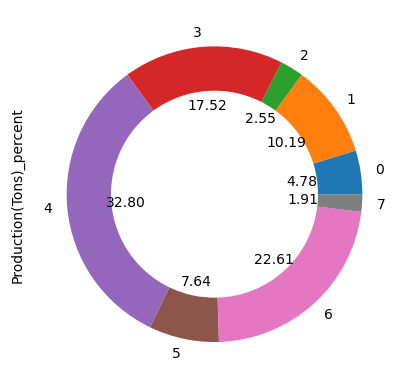

In [42]:
ax = df_new["Production(Tons)_percent"].plot(kind='pie', autopct='%.2f', wedgeprops=dict(width=0.3))


<b>3.Label Selectively:</b> Display labels only for significant slices and hide labels for small slices to keep the chart readable.


<Axes: ylabel='Production(Tons)_percent'>

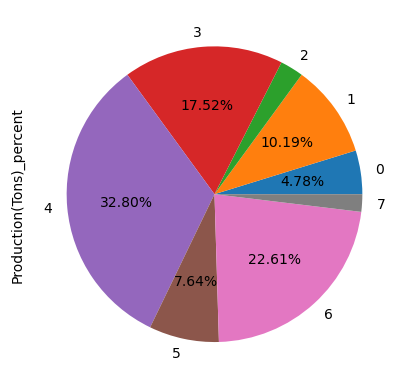

In [43]:
df_new["Production(Tons)_percent"].plot(kind='pie', autopct=lambda p: '{:.2f}%'.format(p) if p > threshold else '')


<b>4. Alternative Visualizations:</b> Consider using bar charts or stacked bar charts if there are too many slices, as they can be more effective for comparing multiple categories.

<Figure size 1400x800 with 0 Axes>

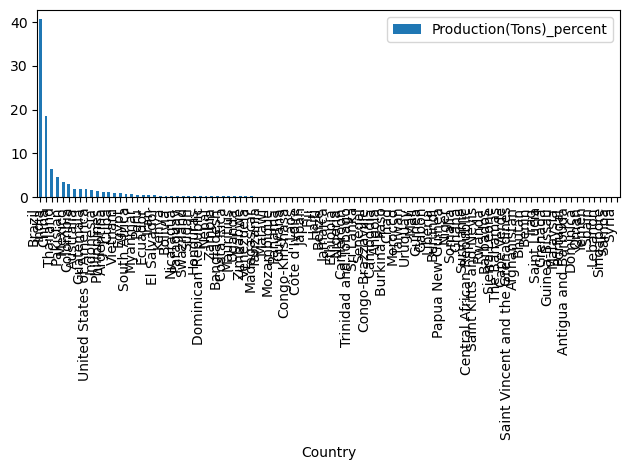

In [72]:
plt.figure(figsize=(14, 8))
df_new.plot(kind='bar', x='Country', y='Production(Tons)_percent')
plt.xticks(rotation=90, ha='right')

# Adjust layout
plt.tight_layout()

As we can see the country names ar eoverlapping so we can also plot top 15 countries


<Axes: ylabel='Country'>

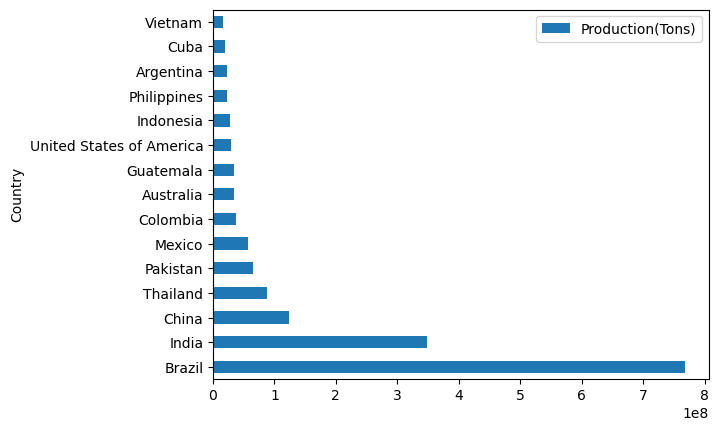

In [73]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "barh")

#### Q. The max sugarcane prouction country

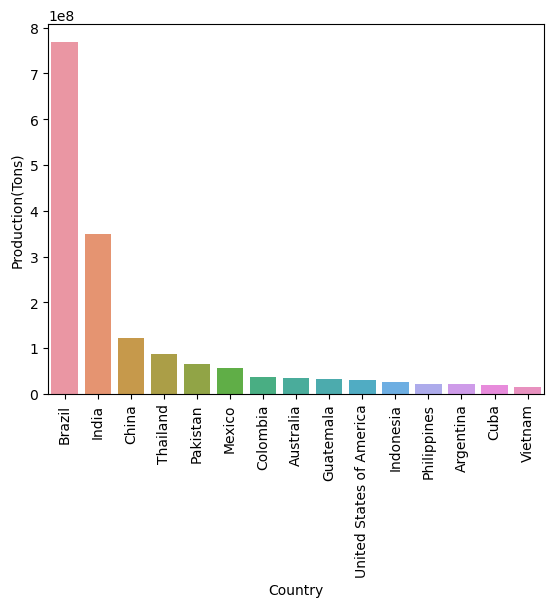

In [77]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

From this above datas we can say "Brazil " is producing maximum Sugarcane.

#### Q.Which country has highest land?

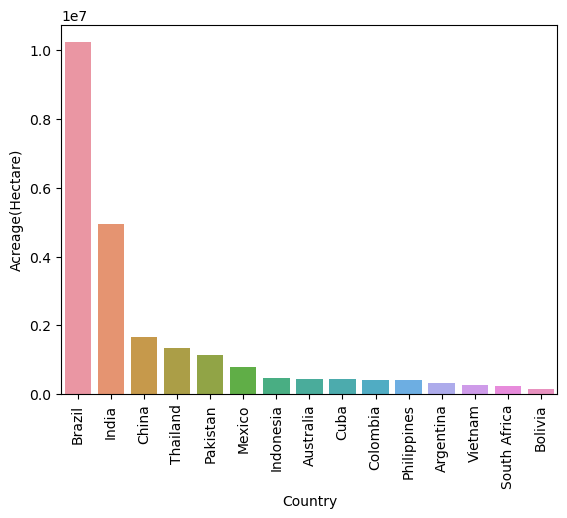

In [81]:
# the values are sorted on behalf of the acreage and chose top 15
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
# the names were overlapping rotated
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

#### Q. Which country has highest yield per hectare?


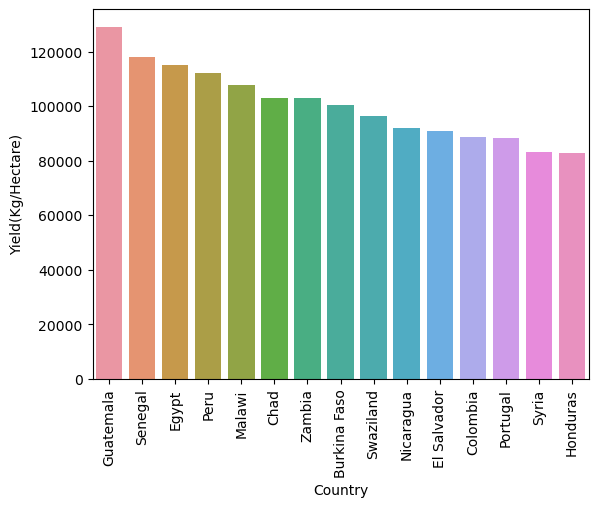

In [82]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

#### Q. Which country has highest production?

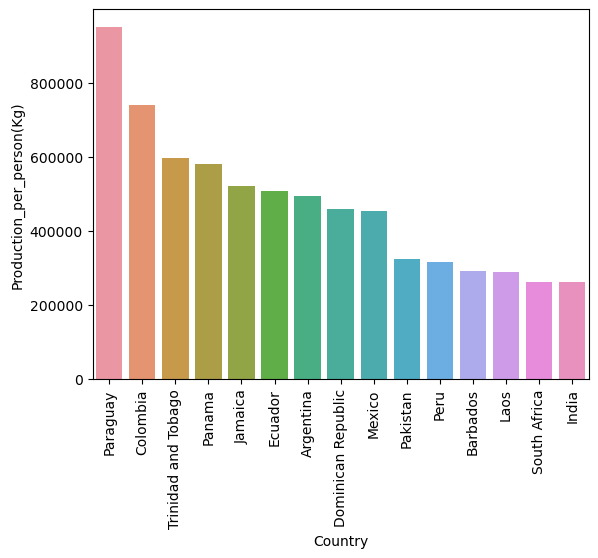

In [83]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## <b>Correleation </b>

In [92]:

df_numeric = df.select_dtypes(include=[float, int])
df_numeric.corr()


,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


### <b> HeatMap:</b>

<Axes: >

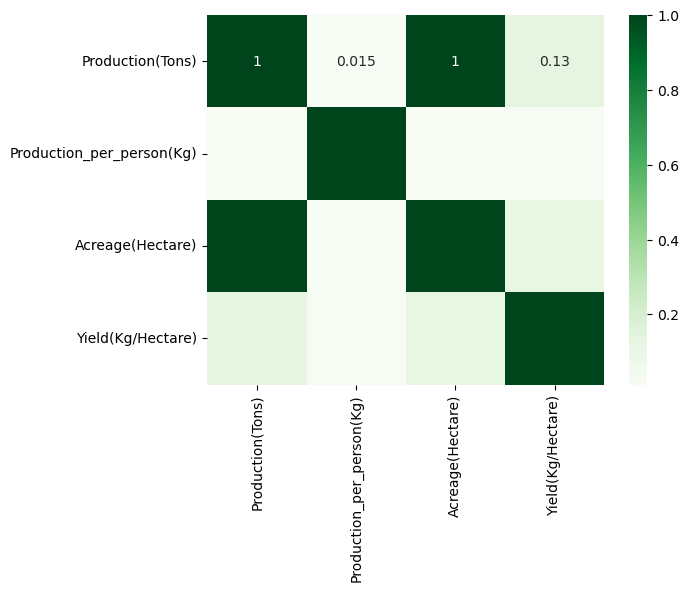

In [95]:
sns.heatmap(df_numeric.corr(), annot = True, cmap="Greens")

#### Q. Do countries with highest land produce more sugarcane?
Ans : <b>Yes</b> below the scatterplot proves it 

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

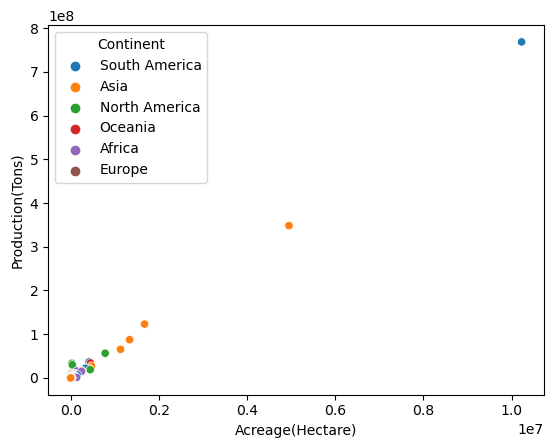

In [96]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

#### Q. Do countries which yield more sugarcane per hectare produces more sugarcane in total?
Ans : <b>No</b> belwo scatterplot defines no patttern between this both 

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

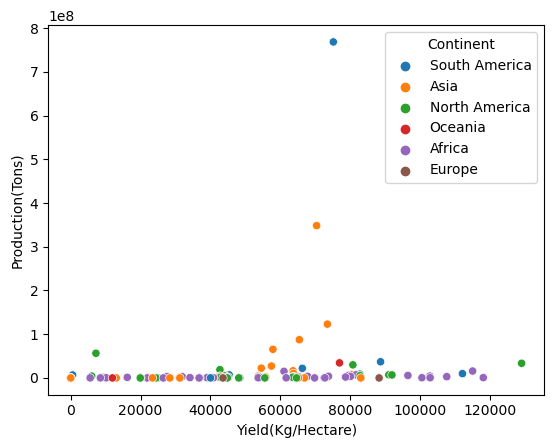

In [98]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

### <b> Analysis for Continent </b>

In [99]:
df_continent = df.groupby("Continent").sum()

Adding new column for number of countries 


In [106]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


#### Q. Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

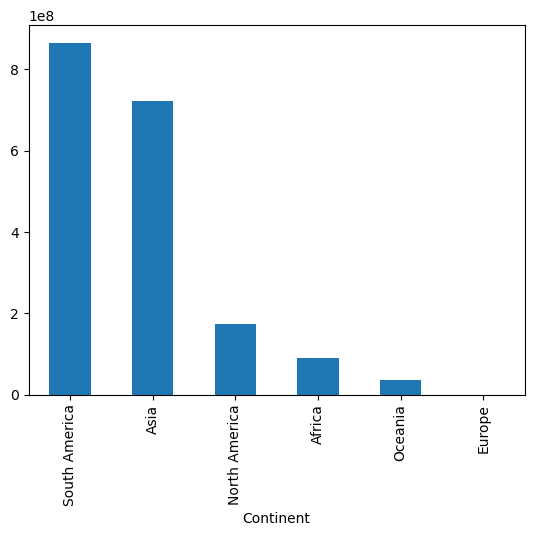

In [107]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

#### Q. Do number of countries in a Continent effects production of sugarcane?
Ans: <b> No</b>
Lets oobserve along with line plot

C:\Users\deeps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deeps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


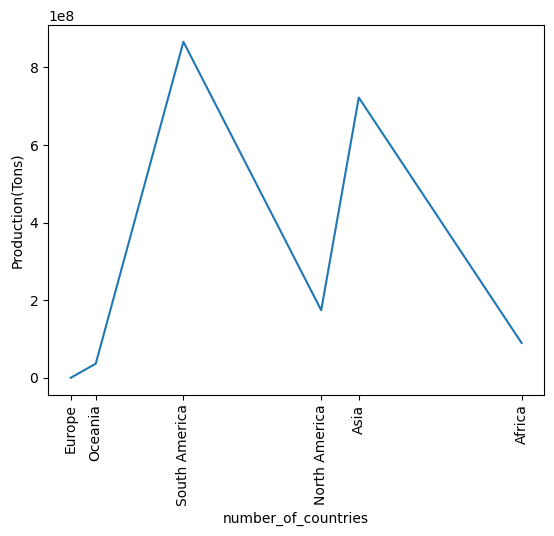

In [108]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

#### Q. Do continent with highest land produces more sugarcane?
ans :<b> yes</b> Observe the line plot

C:\Users\deeps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deeps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

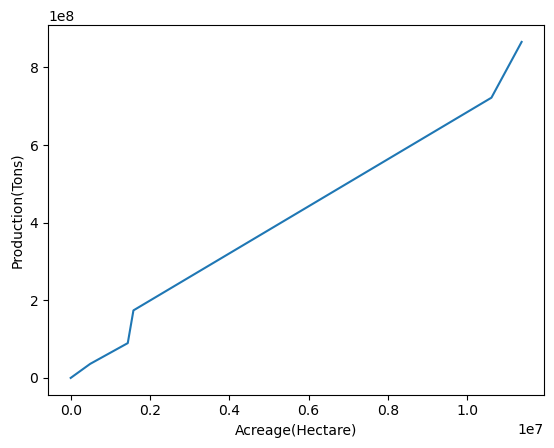

In [110]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

### <b> Production distribution by continent</b>

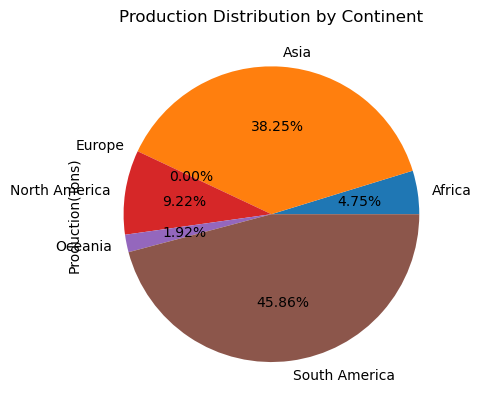

In [111]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

In [118]:
print(df_continent.columns)
print(df_continent.dtypes)
df = pd.DataFrame(df_continent)

# Select only numeric columns
df_numericContinent = df.select_dtypes(include=['float64', 'int64'])



Index(['Country', 'Production(Tons)', 'Production_per_person(Kg)',
       'Acreage(Hectare)', 'Yield(Kg/Hectare)', 'number_of_countries'],
      dtype='object')
Country                       object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
number_of_countries            int64
dtype: object


In [119]:
df_numericContinent.corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: >

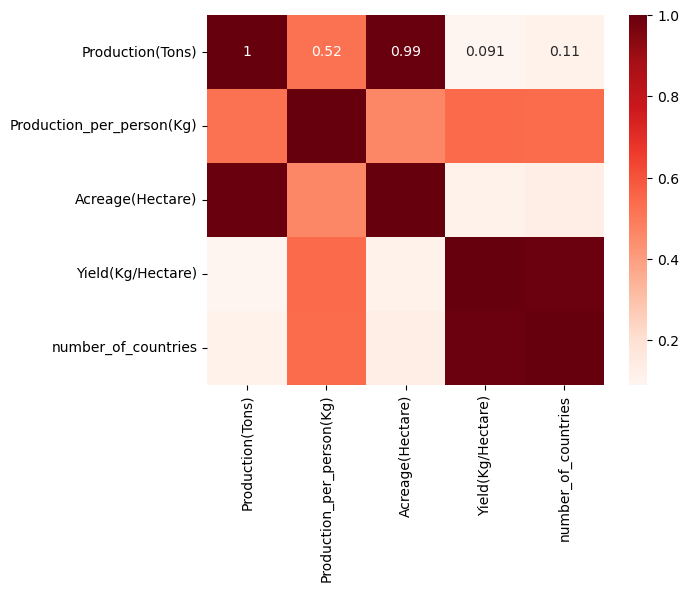

In [120]:
sns.heatmap(df_numericContinent.corr(), annot = True, cmap="Reds")

# **<span style="color: green;">Feel free to adjust the content as needed! If you have any other requirements or questions, just let me know.</span>**

    